# Data Understanding

## Data Loading

Pada bagian ini, kita akan mencoba membaca dataset secara langsung dari folder dataset yang sudah di download melalui [Ames Housing Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). Dataset yang diguanakan adalah train.csv yang berisi dataset untuk proses pelatihan model.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
%matplotlib inline
import seaborn as sns

### Load the dataset

In [2]:
# load the dataset
train_data = 'house-prices/train.csv'
test_data = 'house-prices/test.csv'
house = pd.read_csv(train_data)

house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Konversi dataframe ke dalam format markdown
# print(tabulate(house.head(), tablefmt="pipe", headers="keys"))

Output dari kode diatas memberikan informasi sebagai berikut:

- Terdapat 1.460 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 81 kolom yaitu: Id, MSSubClass, MSZoning, LotFrontage, dan sebagainya.

Untuk test_data nanti akan digunakan pada proses pengujian hasil model dibagian prediksi model. Untuk proses pelatihan model machine learning akan digunakan dataset dari train_data.

## Exploratory Data Analysis - Deskripsi Variabel

Exploratory data analysis atau sering disingkat EDA merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Pada proses EDA ini kita akan melakukan deskripsi variabel untuk mengetahui informasi lebih lengkap dan mengecek informasi pada dataset. Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) Terdapat sekitar 80 variabel (termasuk harga rumah) yang dijelaskan lebih lengkap di file data_description.txt. Berikut adalah contoh penjelasan dari salah satu variabel yaitu MSZoning yang berasal dari file data_description.txt:
- MSZoning : Mengidentifikasi klasifikasi zona umum dari penjualan. Terdiri dari:
   - A : Pertanian
   - C : Komersial
   - FV : Perumahan Desa Mengambang
   - I : Industri
   - RH : Kepadatan Tinggi Perumahan
   - RL : Kepadatan Rendah Perumahan
   - RP : Taman Kepadatan Rendah Perumahan
   - RM : Kepadatan Sedang Perumahan

Untuk mengecek informasi pada dataset digunakan fungsi info() berikut.

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dari output terlihat bahwa:
- Terdapat 43 kolom dengan tipe object. Kolom ini merupakan categorical features (fitur non-numerik)
- Terdapat 3 kolom dengan tipe data float64. Kolom ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 35 kolom dengan tipe data int64. Kolom ini merupakan fitur numerik yang salah satunya adalah target fitur kita yaitu harga jual rumah.

Terdapat juga beberapa fitur/kolom yang memiliki nilai null/NaN, kita bisa melakukan cek terlebih dahulu mengenai hal tersebut.

In [5]:
def check_nan(data):
    nan_counts = data.isna().sum()
    columns_with_nan = nan_counts[nan_counts > 0].index.tolist()

    return pd.DataFrame({
        'Fitur': columns_with_nan,
        'Jumlah NaN/Null': nan_counts[columns_with_nan].tolist()
    })

print("Informasi NaN/Null dalam bentuk DataFrame:")
print(check_nan(house))

Informasi NaN/Null dalam bentuk DataFrame:
           Fitur  Jumlah NaN/Null
0    LotFrontage              259
1          Alley             1369
2     MasVnrType                8
3     MasVnrArea                8
4       BsmtQual               37
5       BsmtCond               37
6   BsmtExposure               38
7   BsmtFinType1               37
8   BsmtFinType2               38
9     Electrical                1
10   FireplaceQu              690
11    GarageType               81
12   GarageYrBlt               81
13  GarageFinish               81
14    GarageQual               81
15    GarageCond               81
16        PoolQC             1453
17         Fence             1179
18   MiscFeature             1406


Berdasarkan kode diatas, terdapat 19 fitur yang mempunyai nilai NaN/Null. Karena nilai ini nantinya akan mengganggu kinerja dari model maka kita akan hapus fitur yang memiliki nilai NaN/Null tersebut.

In [6]:
columns_with_nan = house.columns[house.isna().any()].tolist()

print("Fitur yang mengandung NaN:")
print(columns_with_nan)

Fitur yang mengandung NaN:
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
house.drop(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True, axis=1)

house

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
house.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Fungsi describe() memberikan informasi statistik pada masing - masing kolom, antara lain:
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## Exploratory Data Analysis - Menangani Missing Value, Outliers dan Menghapus fitur yang tidak perlu

## Identifikasi Missing Value

Dari hasil fungsi describe(), nilai minimum untuk beberapa kolom adalah 0. Karena terdapat banyak fitur dalam dataset, sehingga dibeberapa kasus nilai 0 ini menyulitkan bagi kita untuk melihat keseluruhan fitur, maka kita lakukan investigasi untuk mencari informasi semua fitur dengan nilai minimum sama dengan 0 melalui kode dibawah ini.

In [9]:
# Melihat informasi semua fitur dengan nilai minimum 0
describe_result = house.describe()
min_values_0 = (describe_result.loc["min"] == 0)
col_with_min_0  = min_values_0[min_values_0].index

print(f"Jumlah kolom dengan nilai minimum 0: {len(col_with_min_0)}\n")
print("Fitur dengan nilai minimum 0:")
print(f"{col_with_min_0}\n")

for min_0 in col_with_min_0:
    index_min_0 = (house[min_0] == 0).sum()
    print(f"Nilai 0 di kolom {min_0} ada: ", index_min_0)

Jumlah kolom dengan nilai minimum 0: 22

Fitur dengan nilai minimum 0:
Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

Nilai 0 di kolom BsmtFinSF1 ada:  467
Nilai 0 di kolom BsmtFinSF2 ada:  1293
Nilai 0 di kolom BsmtUnfSF ada:  118
Nilai 0 di kolom TotalBsmtSF ada:  37
Nilai 0 di kolom 2ndFlrSF ada:  829
Nilai 0 di kolom LowQualFinSF ada:  1434
Nilai 0 di kolom BsmtFullBath ada:  856
Nilai 0 di kolom BsmtHalfBath ada:  1378
Nilai 0 di kolom FullBath ada:  9
Nilai 0 di kolom HalfBath ada:  913
Nilai 0 di kolom BedroomAbvGr ada:  6
Nilai 0 di kolom KitchenAbvGr ada:  1
Nilai 0 di kolom Fireplaces ada:  690
Nilai 0 di kolom GarageCars ada:  81
Nilai 0 di kolom GarageArea 

Berdasarkan kode diatas, didapat bahwa terdapat 22 fitur yang memiliki nilai minimum 0. Berdasarkan data description di file data_description.txt kita mengetahui bahwa nilai 0 di dataset juga memiliki makna tertentu yang artinya bukan merupakan nilai missing value tapi berupa informasi yang ada di beberapa variabel. Misalnya untuk fitur PoolArea yang paling banyak terdapat nilai 0 sebesar 1.453, nilai 0 disini memiliki arti bahwa di beberapa jenis properti rumah tersebut tidak terdapat kolam renang. Nilai 0 ini juga tidak bisa dianggap sebagai tipe data boolean karena angka 0 disini memiliki arti jumlah (kuantitas) bukan bermakna True/False. Jadi bisa kita simpulkan bahwa tidak terdapat missing value pada dataset tersebut.

In [10]:
house.shape

(1460, 62)

## Menghilangkan outliers

Outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Ada beberapa teknik outliers yang umum digunakan. Pada proyek ini kita akan menggunakan metode IQR (Inter Quartile Range). IQR menggunakan konsep kuartil untuk menghilangkan outliers, Kuartil dari suatu populasi adalah tiga nilai yang membagi distribusi data menjadi empat sebaran. Seperempat dari data berada di bawah kuartil pertama (Q1), setengah dari data berada di bawah kuartil kedua (Q2), dan tiga perempat dari data berada di kuartil ketiga (Q3). Dengan demikian interquartile range atau IQR = Q3 - Q1. Sekarang kita visualisasikan terlebih dahulu dataset dengan boxplot untuk mendeteksi outliers pada beberapa fitur numerik.

<AxesSubplot:xlabel='MSSubClass'>

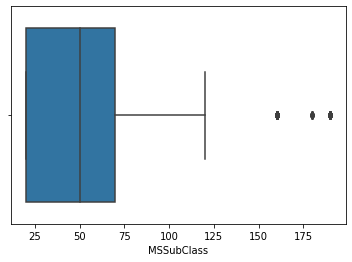

In [11]:
# fitur MSSubClass
sns.boxplot(x=house['MSSubClass'])

<AxesSubplot:xlabel='LotArea'>

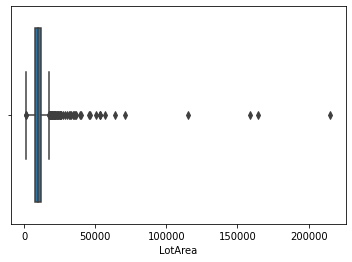

In [12]:
# fitur LotArea
sns.boxplot(x=house['LotArea'])

Jika kita perhatikan ada beberapa fitur numerik yang memiliki outliers. Selanjutnya kita akan mengatasi outliers tersebut dengan metode IQR. Kita akan menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

In [13]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    house = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
    return house

# Cek ukuran dataset setelah kita drop outliers
house = remove_outliers(house)
house.shape

C:\Users\unoto\AppData\Local\Temp\ipykernel_14116\2994849075.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  house = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]


(601, 62)

<AxesSubplot:xlabel='MSSubClass'>

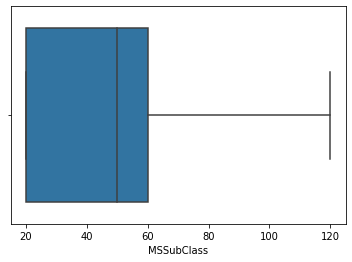

In [14]:
# cek kembali fitur MSSubClass dari outliers
sns.boxplot(x=house['MSSubClass'])

Dataset kita sekarang sudah bersih dan memiliki 601 sampel.

## Menghapus fitur yang tidak diperlukan

Sebelum kita melakukan proses analisis data lebih lanjut. Kita perlu mengecek fitur yang tidak terlalu berpengaruh pada proses pemodelan nantinya. Penghapusan fitur yang tidak diperlukan akan membantu mempercepat proses pelatihan model dan membantu kita lebih memahami data dengan lebih mudah. Pertama, Kita akan menghapus kolom Id karena tidak terlalu berpengaruh pada proses training nantinya.

In [15]:
# Menghapus kolom Id
house = house.drop('Id', axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,307000
10,20,RL,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,0,0,0,2,2008,WD,Normal,129500


Kita juga akan mengecek jumlah fitur yang mempunyai unique value hanya 1 saja. Jika suatu fitur hanya memiliki satu nilai unik, maka fitur tersebut tidak terlalu berpengaruh atau memberikan banyak informasi yang berguna dalam analisis statistik atau pemodelan. Fitur ini sering disebut juga sebagai fitur konstan.

In [16]:
def check_unique1(data):
    for column in data.columns:
        if len(data[column].unique()) == 1:
            print(f"Fitur '{column}' memiliki hanya satu nilai unik.")

check_unique1(house)

Fitur 'Utilities' memiliki hanya satu nilai unik.
Fitur 'Condition2' memiliki hanya satu nilai unik.
Fitur 'RoofMatl' memiliki hanya satu nilai unik.
Fitur 'BsmtFinSF2' memiliki hanya satu nilai unik.
Fitur 'LowQualFinSF' memiliki hanya satu nilai unik.
Fitur 'BsmtHalfBath' memiliki hanya satu nilai unik.
Fitur 'KitchenAbvGr' memiliki hanya satu nilai unik.
Fitur 'EnclosedPorch' memiliki hanya satu nilai unik.
Fitur '3SsnPorch' memiliki hanya satu nilai unik.
Fitur 'ScreenPorch' memiliki hanya satu nilai unik.
Fitur 'PoolArea' memiliki hanya satu nilai unik.
Fitur 'MiscVal' memiliki hanya satu nilai unik.


Ternyata terdapat beberapa fitur konstan yang ada di dalam dataset kita. Seperti penjelasan sebelumnya, fitur konstan tidak terlalu berpengaruh maka kita akan hapus fitur tersebut dari dataset.

In [17]:
for column in house.columns:
    if len(house[column].unique()) == 1:
        house.drop(column, axis=1, inplace=True)

In [18]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,2,548,Y,0,61,2,2008,WD,Normal,208500
2,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,2,608,Y,0,42,9,2008,WD,Normal,223500
4,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,3,836,Y,192,84,12,2008,WD,Normal,250000
6,20,RL,10084,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,2,636,Y,255,57,8,2007,WD,Normal,307000
10,20,RL,11200,Pave,Reg,Lvl,Inside,Gtl,Sawyer,Norm,...,1,384,Y,0,0,2,2008,WD,Normal,129500


Sekarang hanya tinggal 49 fitur yang tersedia.

## Exploratory Data Analysis - Univariate Analysis

Sebelum kita akan melakukan proses analisis data dengan teknik Univariate EDA. Pertama, kita bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features (non numerik). Lakukan analisis pada fitur kategori terlebih dahulu.

In [19]:
numerical_features = house.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = house.select_dtypes(include=['object']).columns.tolist()

### Categorical Features

Statistik untuk fitur MSZoning:

    jumlah sampel  persentase
RL            520        86.5
RM             46         7.7
FV             32         5.3
RH              3         0.5




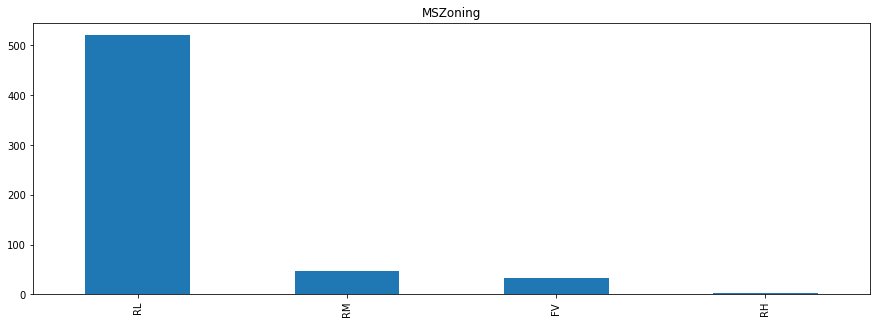

Statistik untuk fitur Street:

      jumlah sampel  persentase
Pave            600        99.8
Grvl              1         0.2




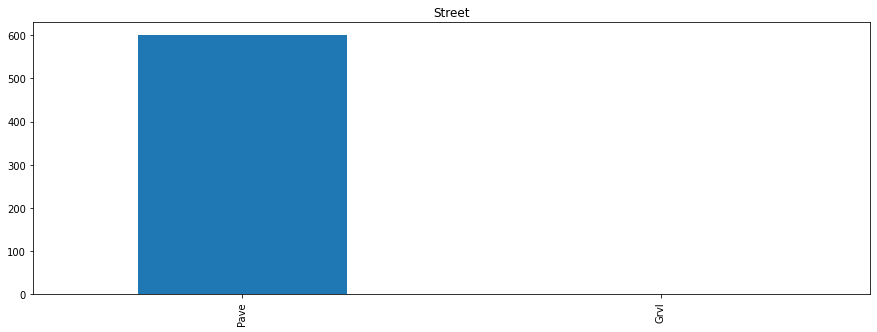

Statistik untuk fitur LotShape:

     jumlah sampel  persentase
Reg            351        58.4
IR1            235        39.1
IR2             11         1.8
IR3              4         0.7




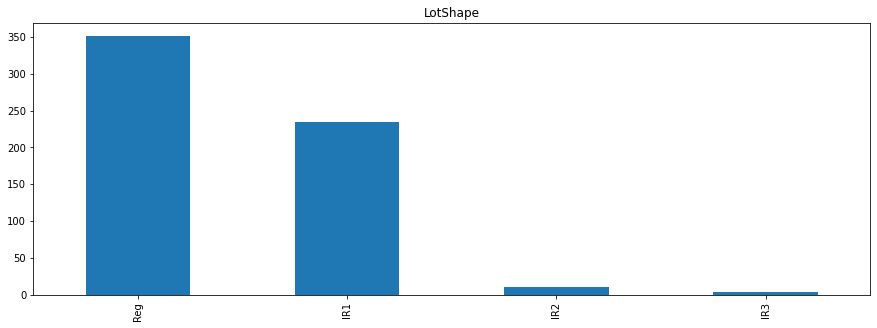

Statistik untuk fitur LandContour:

     jumlah sampel  persentase
Lvl            555        92.3
HLS             21         3.5
Bnk             20         3.3
Low              5         0.8




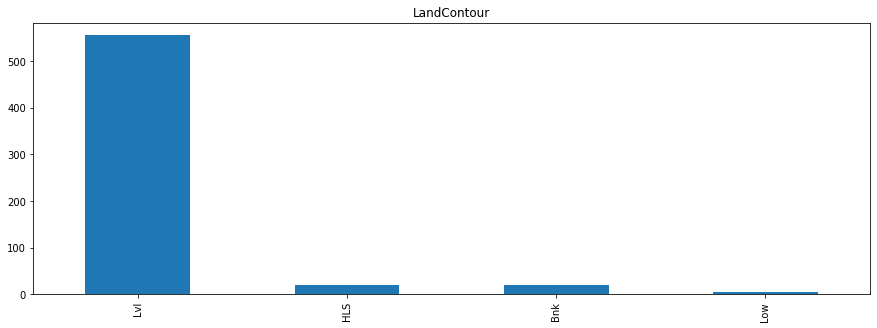

Statistik untuk fitur LotConfig:

         jumlah sampel  persentase
Inside             446        74.2
Corner              95        15.8
CulDSac             37         6.2
FR2                 21         3.5
FR3                  2         0.3




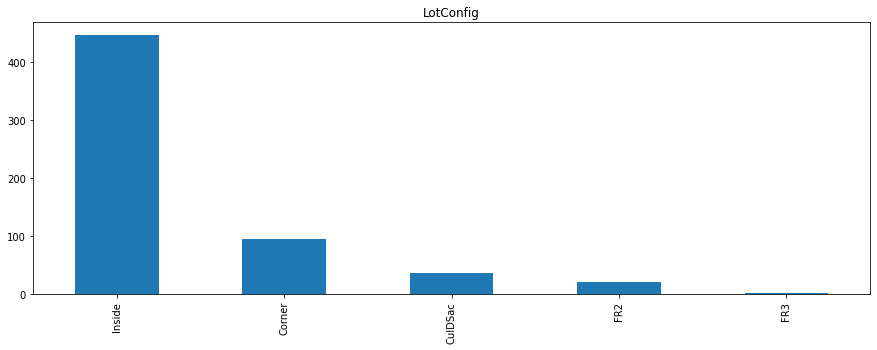

Statistik untuk fitur LandSlope:

     jumlah sampel  persentase
Gtl            583        97.0
Mod             18         3.0




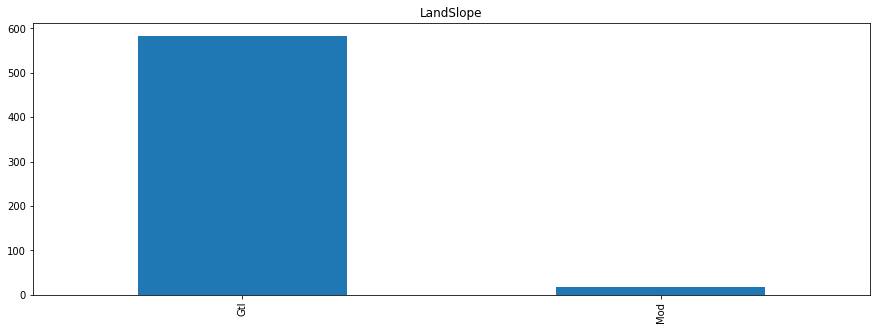

Statistik untuk fitur Neighborhood:

         jumlah sampel  persentase
CollgCr            119        19.8
NAmes               75        12.5
Gilbert             62        10.3
Somerst             47         7.8
NridgHt             36         6.0
Edwards             34         5.7
Sawyer              31         5.2
SawyerW             29         4.8
NWAmes              23         3.8
Timber              22         3.7
OldTown             22         3.7
Mitchel             19         3.2
NoRidge             18         3.0
BrkSide             17         2.8
Blmngtn             14         2.3
Crawfor              8         1.3
StoneBr              6         1.0
IDOTRR               5         0.8
Veenker              4         0.7
ClearCr              4         0.7
SWISU                4         0.7
MeadowV              1         0.2
NPkVill              1         0.2




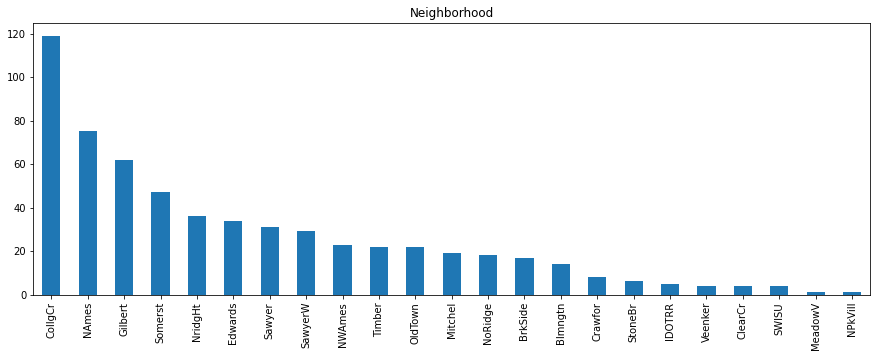

Statistik untuk fitur Condition1:

        jumlah sampel  persentase
Norm              541        90.0
Feedr              22         3.7
Artery             13         2.2
RRAn               11         1.8
RRAe                6         1.0
PosN                5         0.8
RRNe                1         0.2
PosA                1         0.2
RRNn                1         0.2




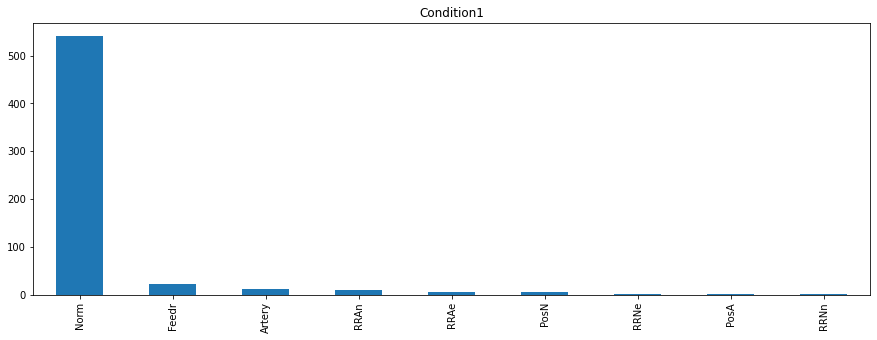

Statistik untuk fitur BldgType:

        jumlah sampel  persentase
1Fam              541        90.0
TwnhsE             50         8.3
Twnhs               5         0.8
Duplex              5         0.8




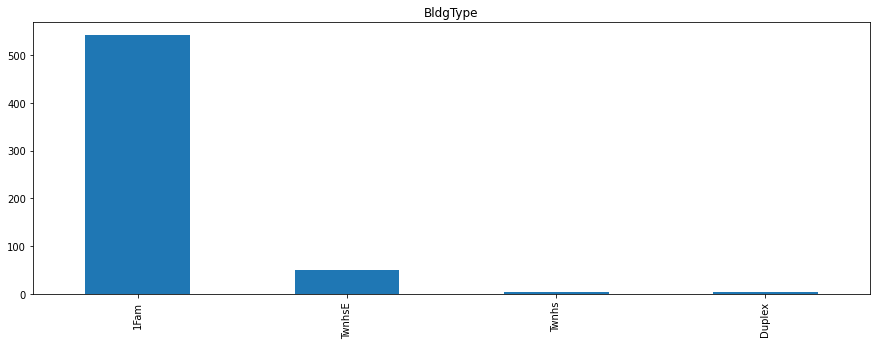

Statistik untuk fitur HouseStyle:

        jumlah sampel  persentase
1Story            336        55.9
2Story            185        30.8
1.5Fin             36         6.0
SLvl               26         4.3
SFoyer             15         2.5
1.5Unf              3         0.5




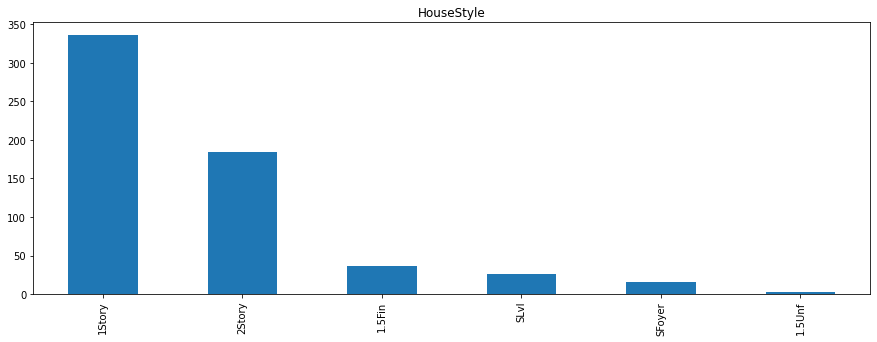

Statistik untuk fitur RoofStyle:

         jumlah sampel  persentase
Gable              494        82.2
Hip                106        17.6
Gambrel              1         0.2




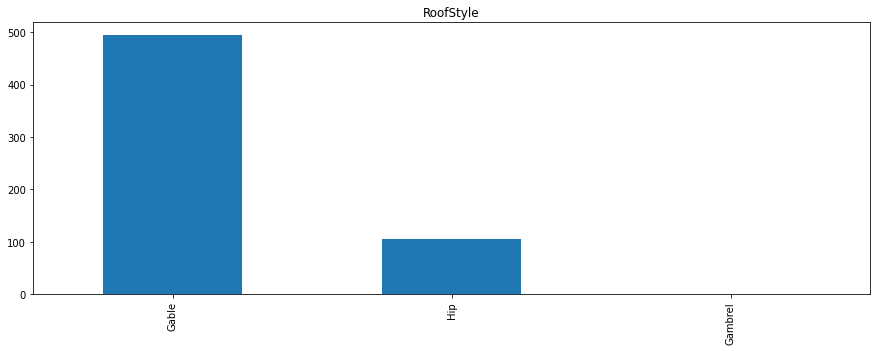

Statistik untuk fitur Exterior1st:

         jumlah sampel  persentase
VinylSd            317        52.7
HdBoard             94        15.6
MetalSd             77        12.8
Wd Sdng             45         7.5
Plywood             24         4.0
CemntBd             17         2.8
BrkFace             11         1.8
WdShing             10         1.7
Stucco               4         0.7
AsbShng              2         0.3




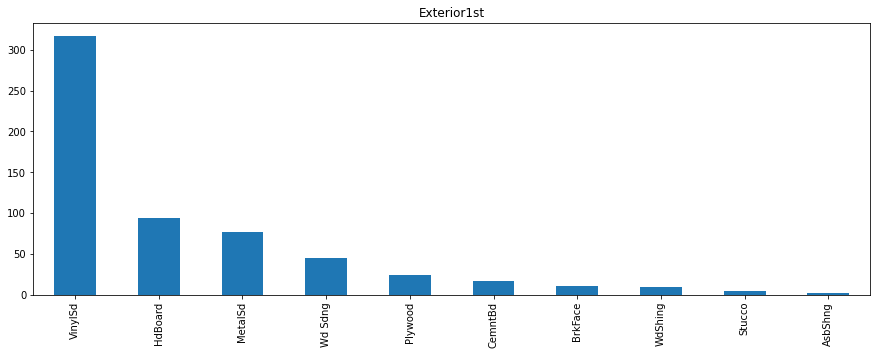

Statistik untuk fitur Exterior2nd:

         jumlah sampel  persentase
VinylSd            315        52.4
HdBoard             84        14.0
MetalSd             75        12.5
Wd Sdng             45         7.5
Plywood             39         6.5
CmentBd             16         2.7
Wd Shng             12         2.0
BrkFace              5         0.8
Stucco               4         0.7
ImStucc              3         0.5
AsbShng              2         0.3
Stone                1         0.2




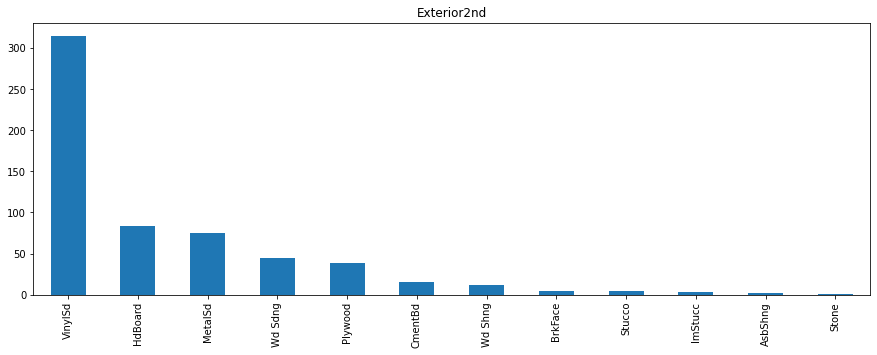

Statistik untuk fitur ExterQual:

    jumlah sampel  persentase
TA            308        51.2
Gd            283        47.1
Ex              9         1.5
Fa              1         0.2




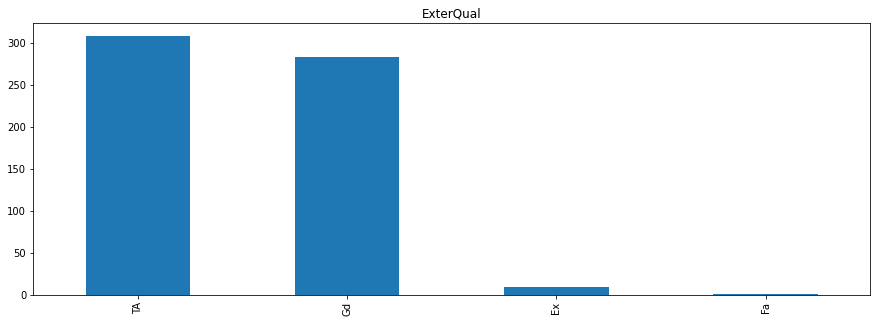

Statistik untuk fitur ExterCond:

    jumlah sampel  persentase
TA            560        93.2
Gd             37         6.2
Fa              4         0.7




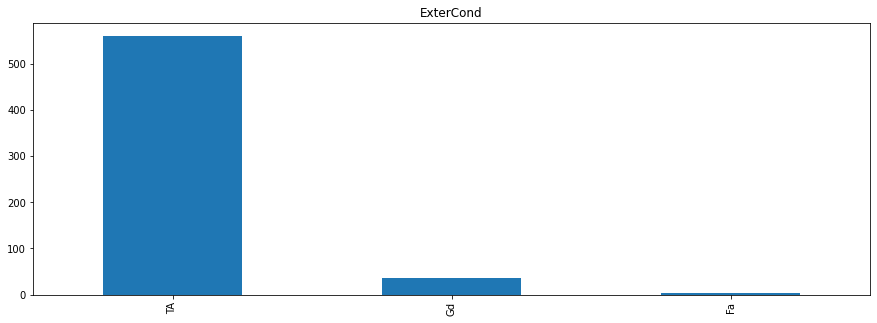

Statistik untuk fitur Foundation:

        jumlah sampel  persentase
PConc             373        62.1
CBlock            197        32.8
BrkTil             29         4.8
Wood                2         0.3




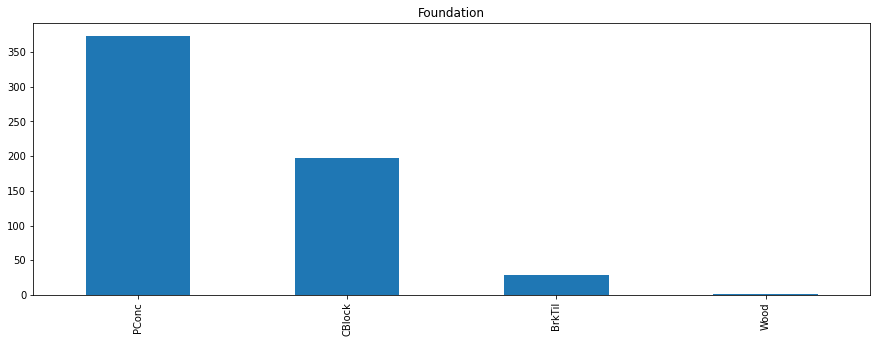

Statistik untuk fitur Heating:

      jumlah sampel  persentase
GasA            598        99.5
Grav              2         0.3
GasW              1         0.2




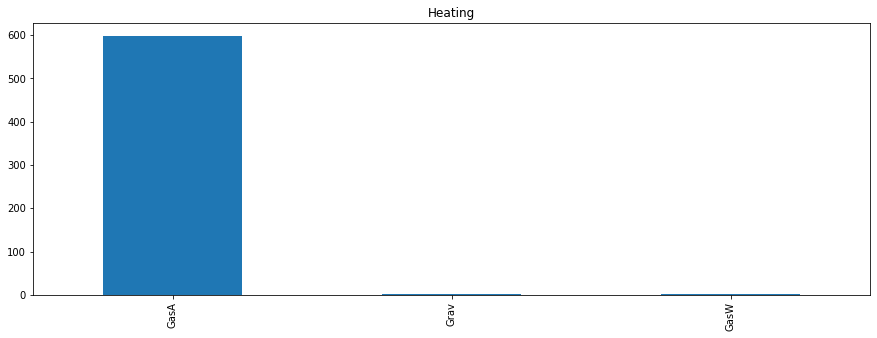

Statistik untuk fitur HeatingQC:

    jumlah sampel  persentase
Ex            383        63.7
TA            127        21.1
Gd             79        13.1
Fa             12         2.0




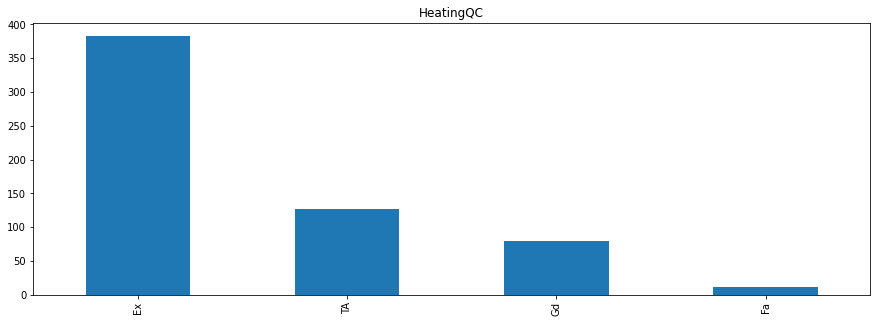

Statistik untuk fitur CentralAir:

   jumlah sampel  persentase
Y            587        97.7
N             14         2.3




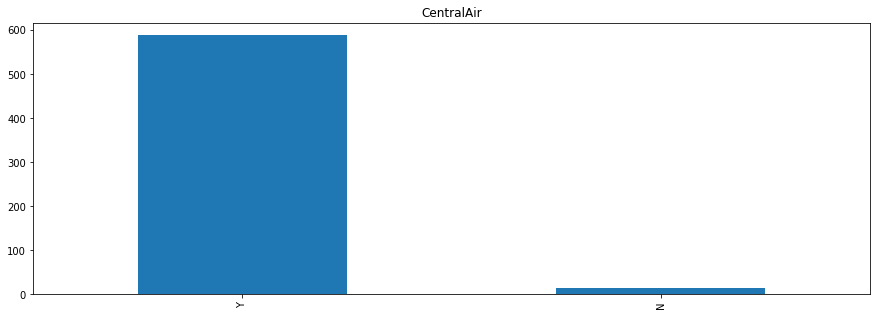

Statistik untuk fitur KitchenQual:

    jumlah sampel  persentase
Gd            312        51.9
TA            250        41.6
Ex             29         4.8
Fa             10         1.7




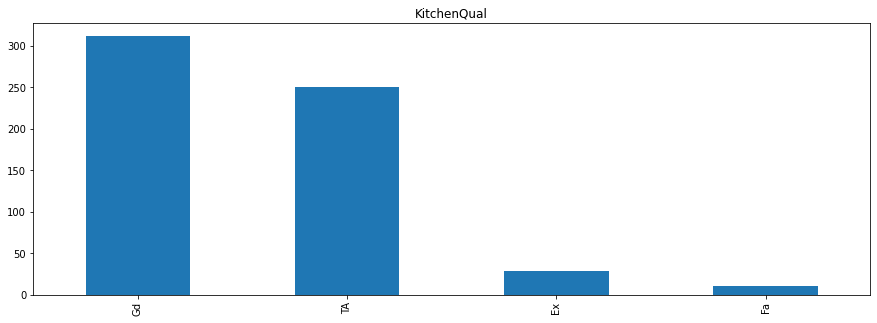

Statistik untuk fitur Functional:

      jumlah sampel  persentase
Typ             586        97.5
Min2              8         1.3
Min1              5         0.8
Maj2              1         0.2
Maj1              1         0.2




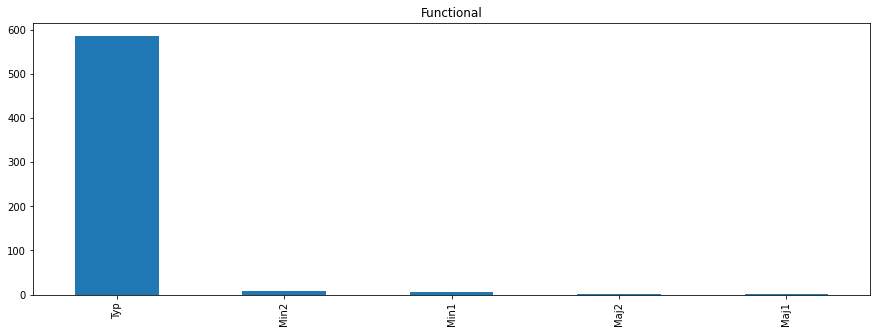

Statistik untuk fitur PavedDrive:

   jumlah sampel  persentase
Y            580        96.5
N             15         2.5
P              6         1.0




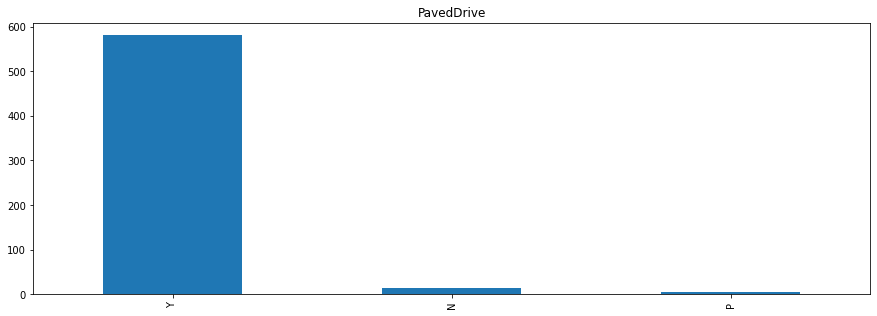

Statistik untuk fitur SaleType:

       jumlah sampel  persentase
WD               507        84.4
New               67        11.1
COD               15         2.5
ConLD              3         0.5
ConLI              2         0.3
Con                2         0.3
CWD                2         0.3
Oth                2         0.3
ConLw              1         0.2




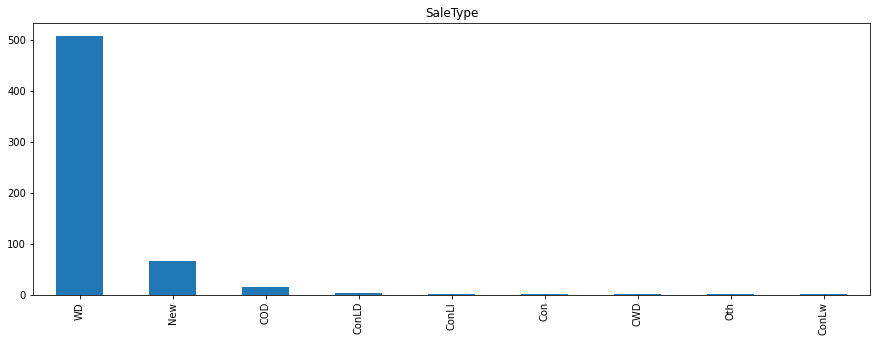

Statistik untuk fitur SaleCondition:

         jumlah sampel  persentase
Normal             487        81.0
Partial             68        11.3
Abnorml             36         6.0
Family               8         1.3
AdjLand              1         0.2
Alloca               1         0.2




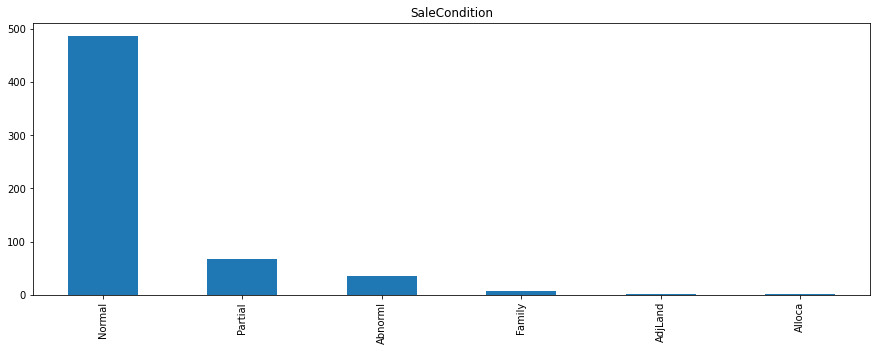

In [20]:
for feature in categorical_features:
    count = house[feature].value_counts()
    percent = 100 * house[feature].value_counts(normalize=True)
    df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(f"Statistik untuk fitur {feature}:\n")
    print(df)
    print("\n")
    
    # Visualisasi dengan bar plot
    plt.figure(figsize=(15, 5))
    count.plot(kind='bar', title=feature)
    plt.show()

Berdasarkan informasi diatas, kita mengetahui bahwa beberapa fitur kategori memiliki persentase yang berbeda. Persentase ini menunjukkan jumlah kategori dari masing - masing fitur atau seberapa sering kategori itu muncul pada fitur tersebut.

### Numerical Features

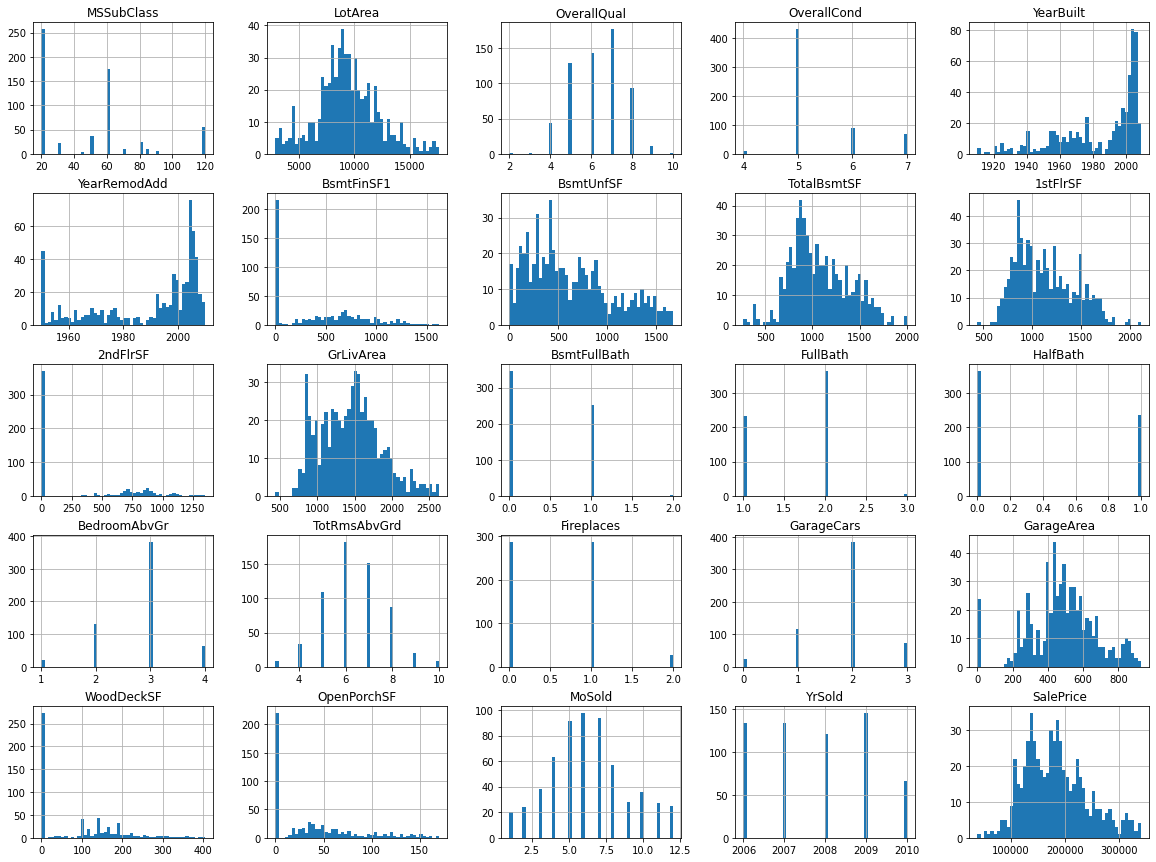

In [21]:
house.hist(bins=50, figsize=(20,15))
plt.show()

Perhatikan histogram diatas, khususnya histogram untuk variabel "SalePrice" yang merupakan fitur target (label) pada dataset kita. Dari histogram "SalePrice" tersebut terdapat beberapa informasi, antara lain:
- Peningkatan harga jual rumah terdistribusi dengan cukup baik. Hal ini dapat dilihat pada histogram "SalePrice" yang mana sampel cenderung meningkat lalu mengalami penurunan seiring dengan meningkatnya harga jual rumah.
- rentang harga jual rumah cukup tinggi yaitu skala puluhan ribu dollar Amerika hingga sekitar $350000.
- Sebagian besar harga jual rumah bernilai antara $100000 sampai $200000.
- Distribusi harga cenderung cukup normal. Hal ini kemungkinan besar akan berimplikasi pada model.

## Exploratory Data Analysis - Multivariate Analysis

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik.

### Categorical Features

c:\Users\unoto\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


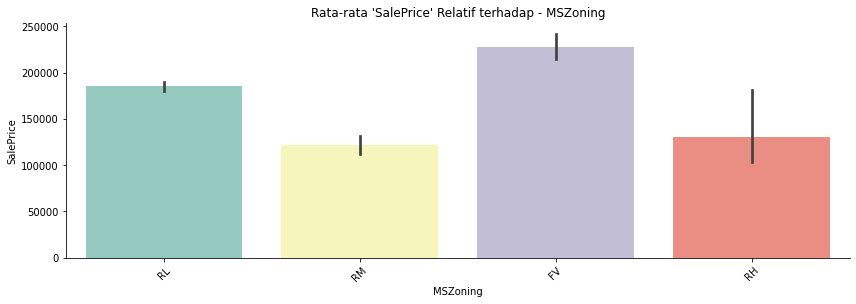

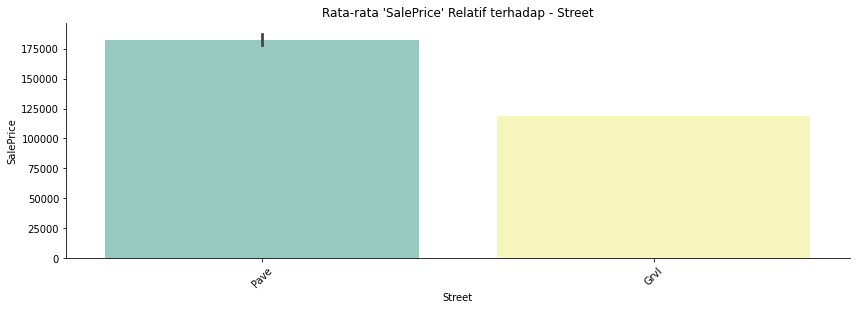

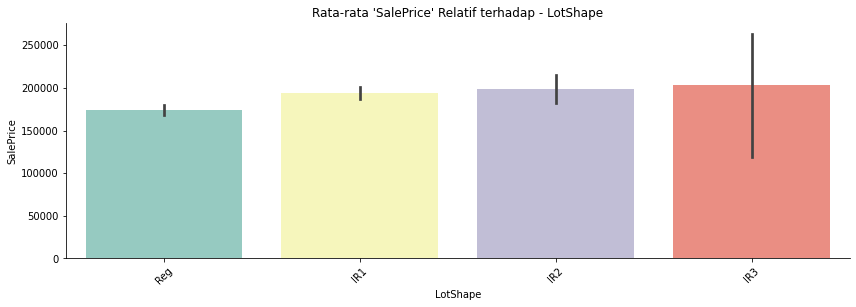

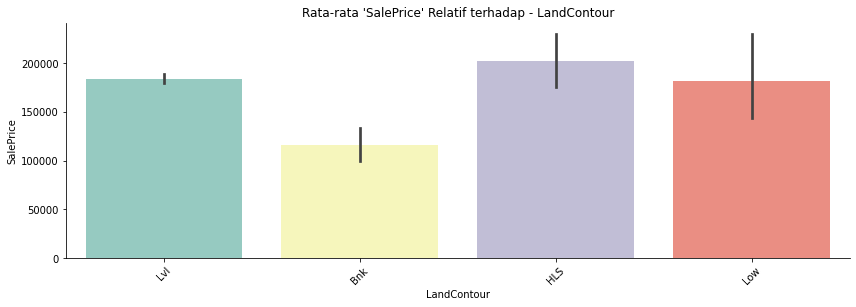

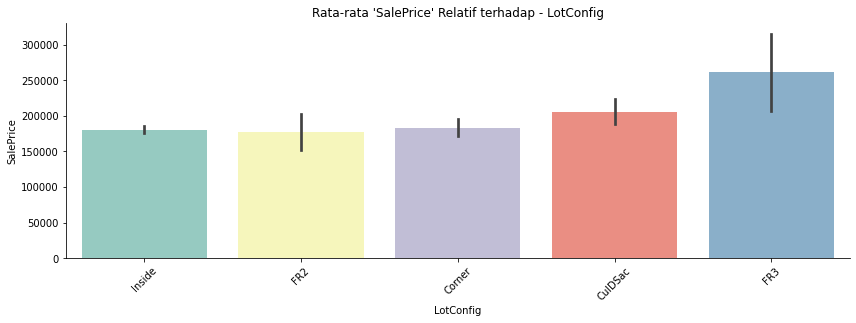

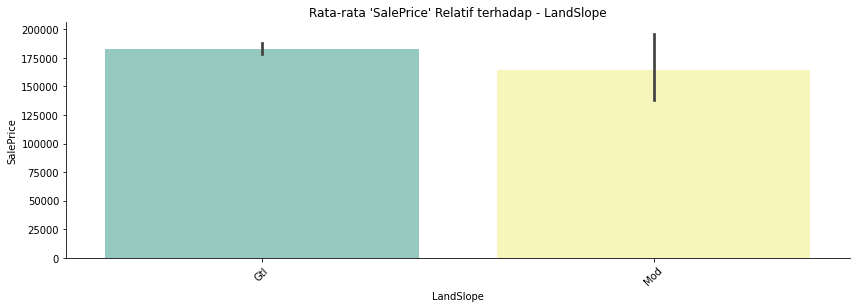

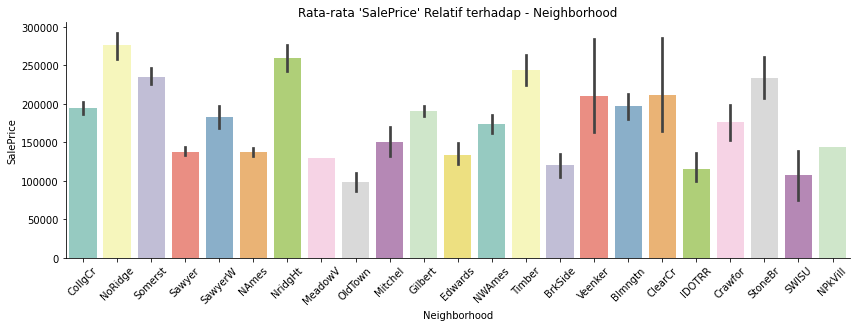

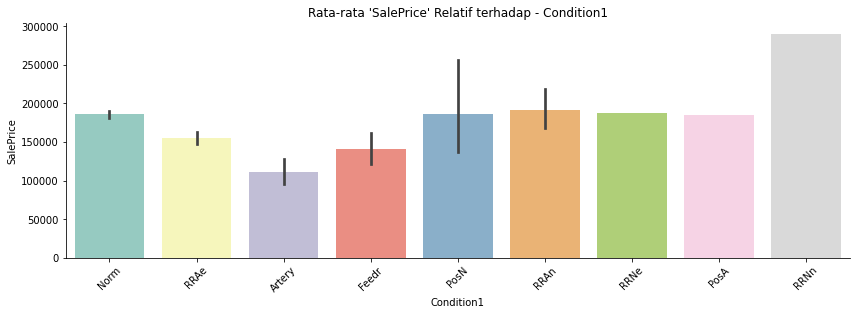

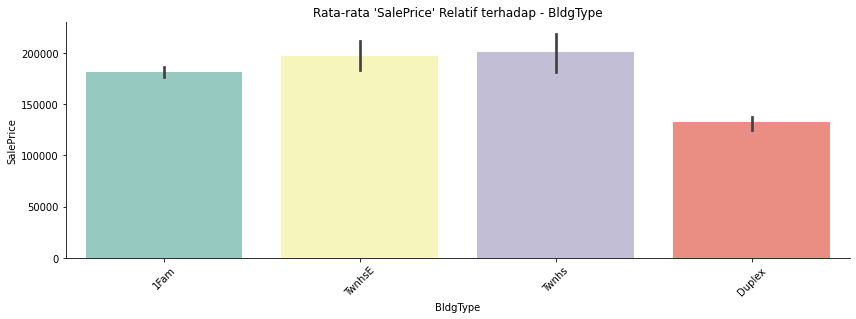

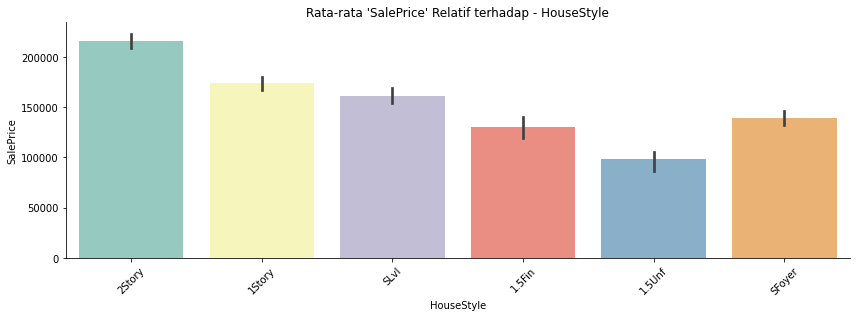

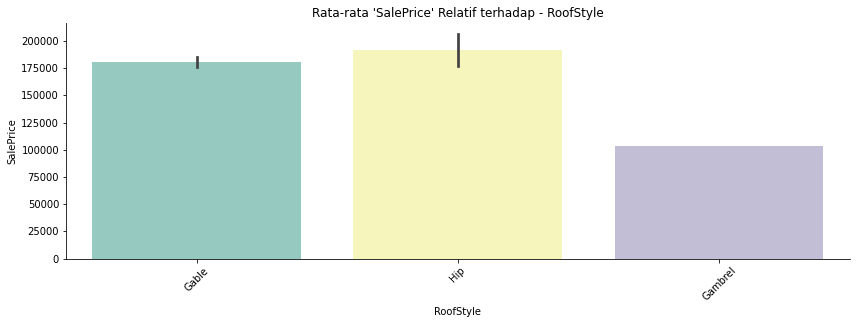

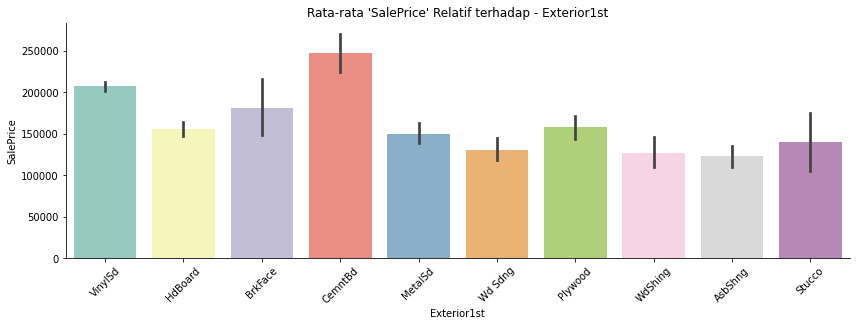

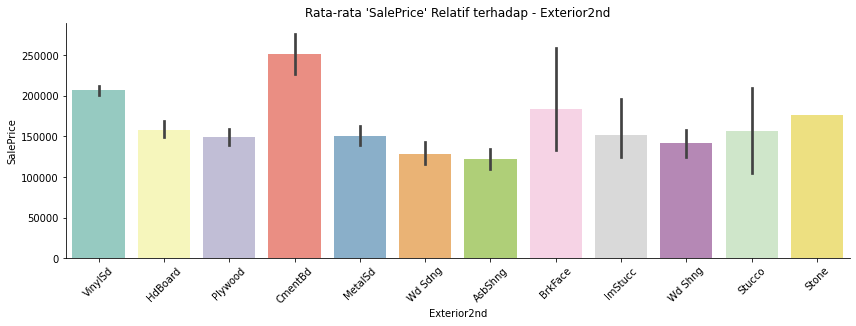

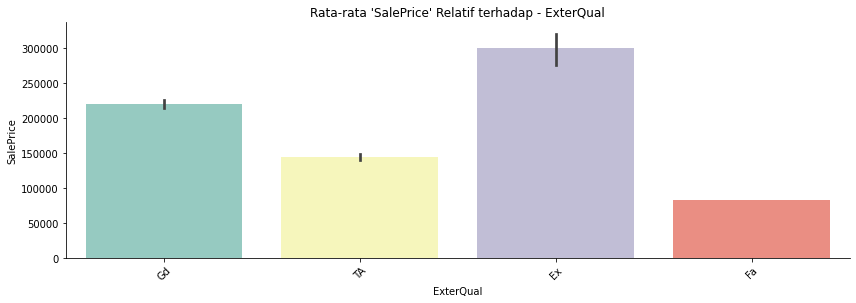

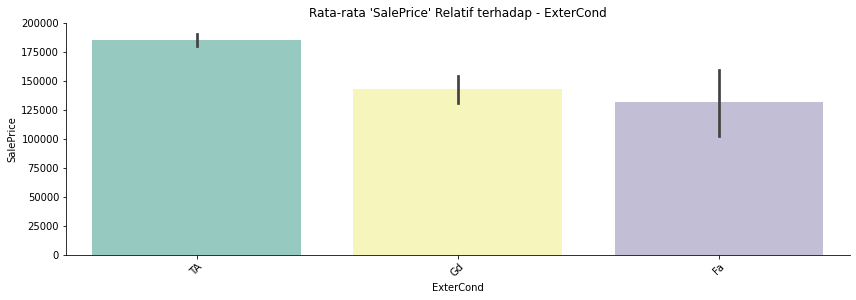

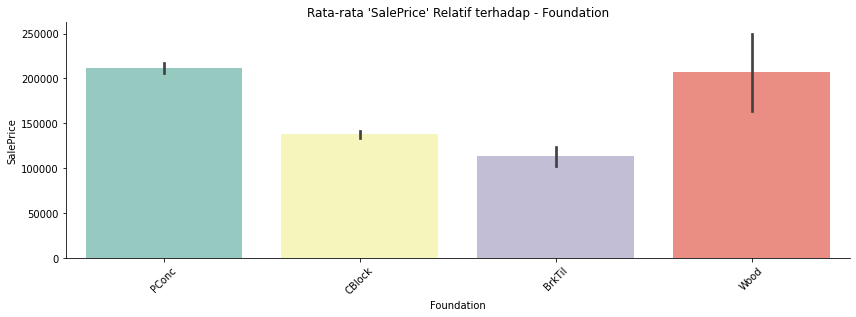

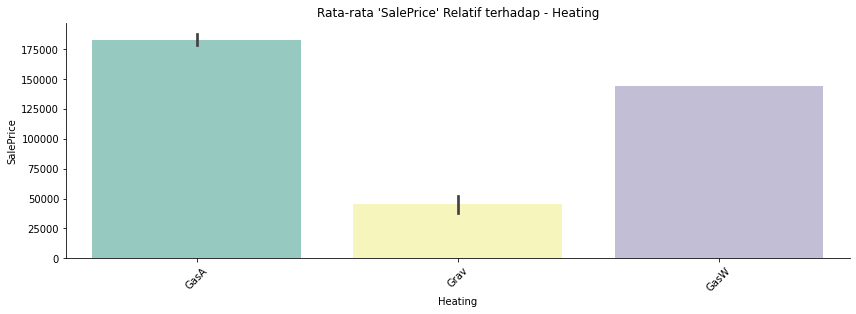

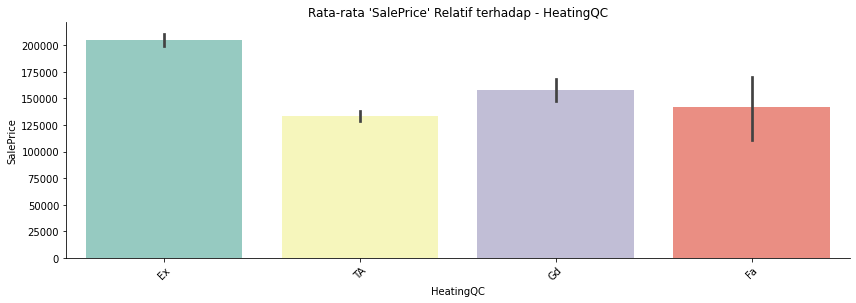

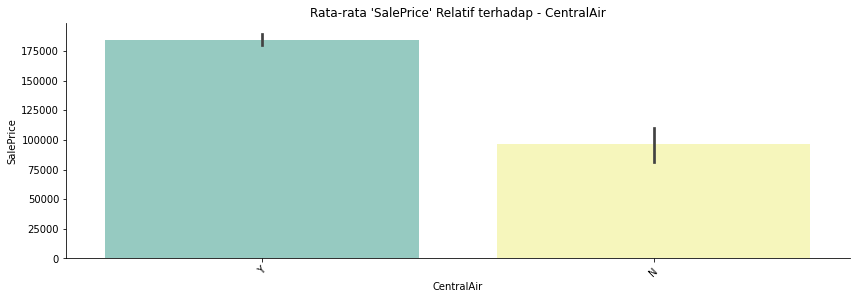

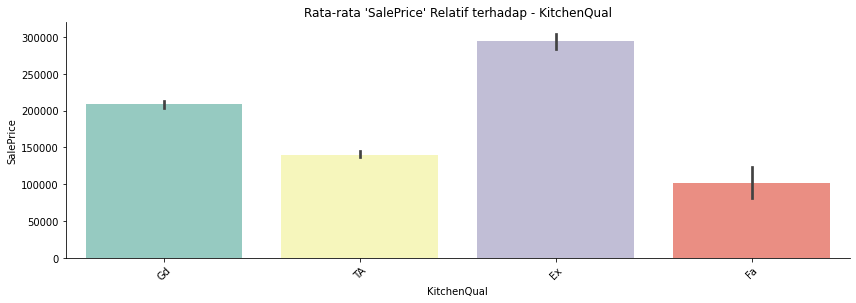

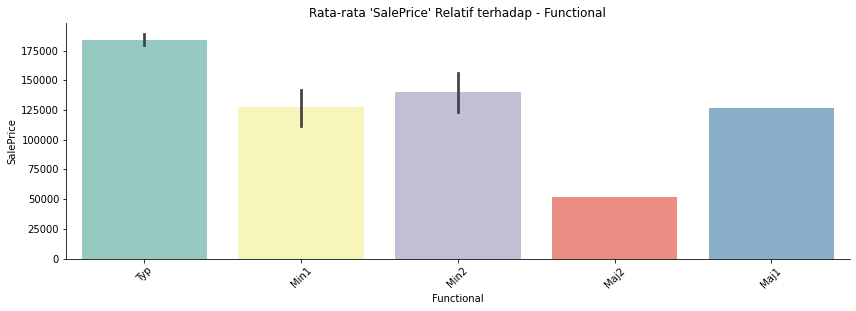

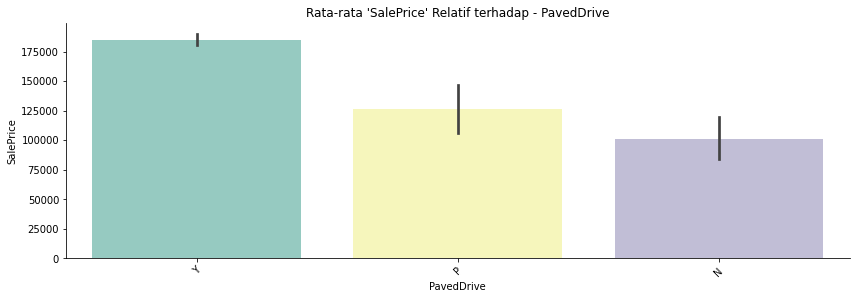

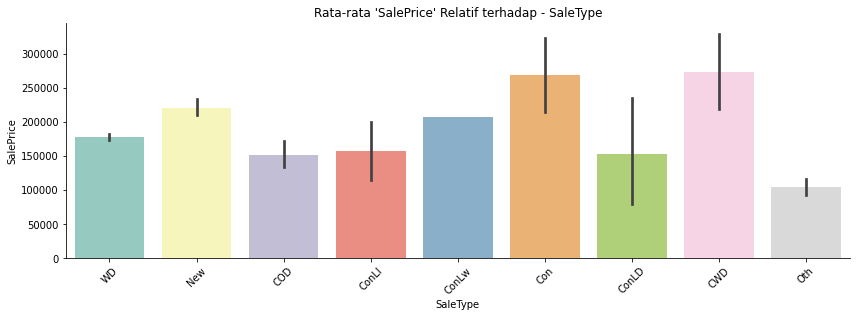

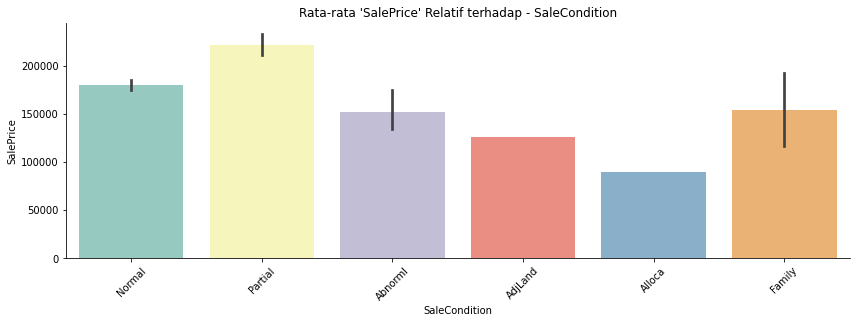

In [22]:
cat_features = house.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="SalePrice", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
  plt.xticks(rotation=45)
  plt.title("Rata-rata 'SalePrice' Relatif terhadap - {}".format(col))

Dengan mengamati rata - rata harga jual rumah relatif terhadap fitur kategori diatas, kita memperoleh insight yaitu bahwa beberapa fitur kategori memiliki pengaruh yang cukup tinggi terhadap harga jual rumah. Misalkan pada fitur PavedDrive (jalan masuk beraspal), harga jual tertinggi dimiliki oleh tipe Y (Paved). Contoh lain pada fitur "KitchenQual", harga jual rumah tertinggi dimiliki oleh tipe kualitas dapur Ex (Excellent) dan sebagainya.

### Numerical Features

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan Corellation matrix untuk melihat hubungan korelasi antar fitur. Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah. Arah korelasi antara dua variabel bisa bernilai positif (nilai kedua variabel cenderung meningkat bersama-sama) maupun negatif (nilai salah satu variabel cenderung meningkat ketika nilai variabel lainnya menurun).

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

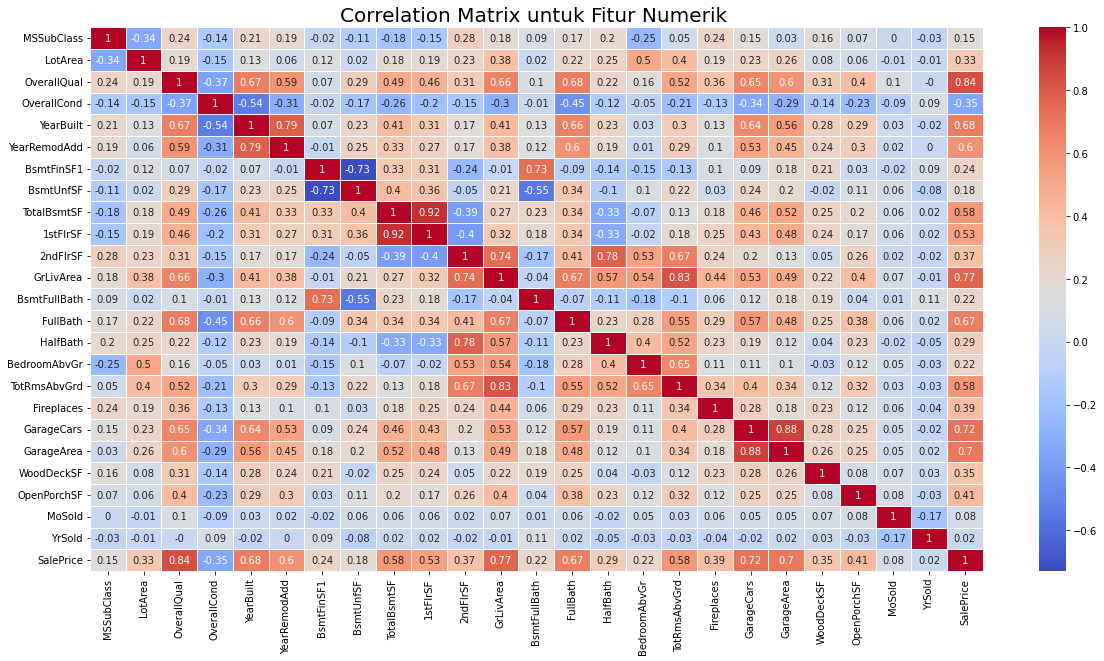

In [23]:
plt.figure(figsize=(20, 10))
correlation_matrix = house.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan matriks korelasi diatas, jika diamati ada beberapa fitur yang memiliki skor korelasi yang cukup besar diatas 70% dengan fitur target yaitu "SalePrice". Fitur tersebut adalah "OveralQual", "GLivArea", "GarageCars", dan "GarageArea". Sementara fitur lainnya memiliki korelasi yang kecil. Sehingga, fitur - fitur tersebut dapat di-drop.

In [24]:
house.drop(["MSSubClass", "LotArea", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "BsmtFullBath", "FullBath", "HalfBath", "BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "MoSold", "YrSold"], inplace=True, axis=1)

house.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,CentralAir,GrLivArea,KitchenQual,Functional,GarageCars,GarageArea,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,Y,1710,Gd,Typ,2,548,Y,WD,Normal,208500
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,Y,1786,Gd,Typ,2,608,Y,WD,Normal,223500
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,Y,2198,Gd,Typ,3,836,Y,WD,Normal,250000
6,RL,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,1Story,...,Y,1694,Gd,Typ,2,636,Y,WD,Normal,307000
10,RL,Pave,Reg,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,1Story,...,Y,1040,TA,Typ,1,384,Y,WD,Normal,129500


Kita juga harus memastikan bawa tidak ada nilai None atau NaN di dalam fitur numerik

In [25]:
numerical_features = house.select_dtypes(include=['float64', 'int64'])
numerical_features = numerical_features.dropna()
numerical_features

,OverallQual,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,1710,2,548,208500
2,7,1786,2,608,223500
4,8,2198,3,836,250000
6,8,1694,2,636,307000
10,5,1040,1,384,129500
...,...,...,...,...,...
1448,4,1346,1,384,112000
1451,8,1578,3,840,287090
1453,5,1140,0,0,84500
1454,7,1221,2,400,185000


In [26]:
house

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,CentralAir,GrLivArea,KitchenQual,Functional,GarageCars,GarageArea,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,Y,1710,Gd,Typ,2,548,Y,WD,Normal,208500
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,Y,1786,Gd,Typ,2,608,Y,WD,Normal,223500
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,Y,2198,Gd,Typ,3,836,Y,WD,Normal,250000
6,RL,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,1Story,...,Y,1694,Gd,Typ,2,636,Y,WD,Normal,307000
10,RL,Pave,Reg,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,1Story,...,Y,1040,TA,Typ,1,384,Y,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,Inside,Gtl,Edwards,Norm,1Fam,2Story,...,N,1346,TA,Min2,1,384,Y,WD,Normal,112000
1451,RL,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,1Story,...,Y,1578,Ex,Typ,3,840,Y,New,Partial,287090
1453,RL,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,...,Y,1140,TA,Typ,0,0,Y,WD,Abnorml,84500
1454,FV,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,1Fam,1Story,...,Y,1221,Gd,Typ,2,400,Y,WD,Normal,185000


# Data Preparation

Pada bagian ini, terdapat empat tahap persiapan data, yaitu:
- Encoding fitur kategori.
- Reduksi dimensi dengan Principal Component Analysis (PCA).
- Pembagian dataset dengan fungsi train_test_split dari library sklearn.
- Standarisasi.

## Encoding Fitur Kategori

Proses encoding fitur kategori menggunakan teknik one-hot-encoding. Teknik ini adalah salah satu metode dalam proses encoding fitur (feature encoding) pada data kategorikal. Tujuannya adalah untuk mengubah variabel kategorikal menjadi representasi biner yang dapat digunakan dalam algoritma pembelajaran mesin. Kita memiliki beberapa variabel kategori. Mari kita lakukan proses encoding ini dengan fitur get_dummies.

In [27]:
cat_features = house.select_dtypes(include='object').columns.to_list()

for feature in cat_features:
    dummies = pd.get_dummies(house[feature], prefix=feature)
    house = pd.concat([house, dummies], axis=1)

house.drop(cat_features, axis=1, inplace=True)
house.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,1710,2,548,208500,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,7,1786,2,608,223500,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,8,2198,3,836,250000,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,8,1694,2,636,307000,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
10,5,1040,1,384,129500,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


## Reduksi Dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang digunakan pada proyek ini adalah PCA. PCA adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

PCA bekerja menggunakan metode aljabar linier. Ia mengasumsikan bahwa sekumpulan data pada arah dengan varians terbesar merupakan yang paling penting (utama). PCA umumnya digunakan ketika variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. Karena hal inilah, teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians dalam variabel asli. Sehingga, saat teknik PCA diterapkan pada data, ia hanya akan menggunakan komponen utama dan mengabaikan sisanya.

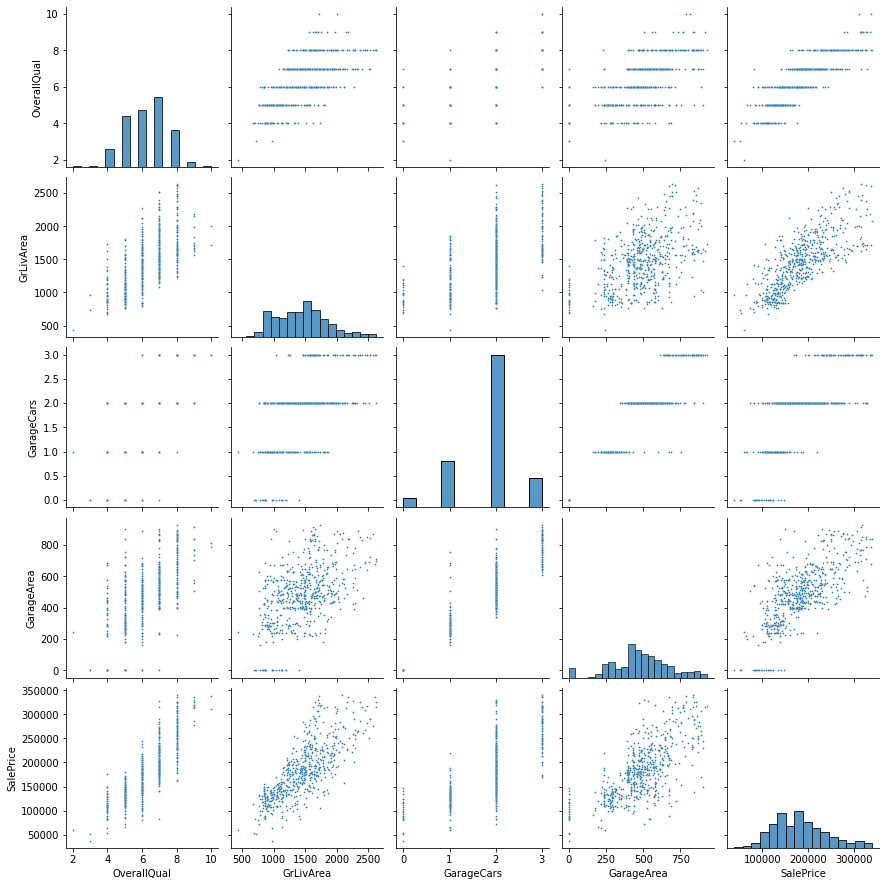

In [28]:
numerical_features = house.select_dtypes(include=['float64', 'int64'])

sns.pairplot(house[numerical_features.columns.tolist()], plot_kws={"s": 3})

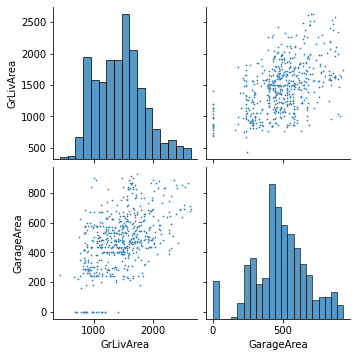

In [29]:
sns.pairplot(house[['GrLivArea', 'GarageArea']], plot_kws={"s": 3})

Berdasarkan dataframe fitur numerik dan pairplot, terdapat beberapa fitur yang akan dilakukan proses reduksi. Fitur GrLivArea dan GarageArea memiliki korelasi yang cukup tinggi. Hal ini terjadi karena beberapa fitur tersebut mengandung informasi yang sama yaitu area/luas. Selanjutnya kita aplikasikan class [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) dari library scikit learn dengan kode berikut:

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(house[['GrLivArea','GarageArea']])
princ_comp = pca.fit_transform(house[['GrLivArea','GarageArea']])

Kode di atas memanggil class PCA() dari library scikit-learn. Paremeter yang kita masukkan ke dalam class adalah n_components dan random_state. Parameter n_components merupakan jumlah komponen atau dimensi, dalam kasus kita jumlahnya ada 2, yaitu 'GrLivArea' dan 'GarageArea'.

Sedangkan, parameter random_state berfungsi untuk mengontrol random number generator yang digunakan. Parameter ini berupa bilangan integer dan nilainya bebas. Pada kasus ini, kita menerapkan random_state = 123. Berapa pun nilai integer yang kita tentukan (selama itu bilangan integer), ia akan memberikan hasil yang sama setiap kali dilakukan pemanggilan fungsi (dalam kasus kita, class PCA).

Setelah class PCA dibuat, kita bisa mengetahui proporsi informasi dari kedua komponen tersebut.

In [31]:
pca.explained_variance_ratio_.round(3)

array([0.873, 0.127])

Arti dari output diatas adalah, 87,3% informasi pada kedua fitur 'GrLivArea' dan 'GarageArea' terdapat pada Principal Component (PC) pertama. Sedangkan sisanya, sebesar 1,27% terdapat pada PC kedua. Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran area menggantikan fitur 'GrLivArea' dan 'GarageArea'. Kita beri nama fitur ini 'dimension'.

In [32]:
pca = PCA(n_components=1, random_state=123)
pca.fit(house[['GrLivArea','GarageArea']])
house['dimension'] = pca.fit_transform(house.loc[:, ('GrLivArea','GarageArea')]).flatten()
house.drop(['GrLivArea','GarageArea'], axis=1, inplace=True)

In [33]:
house

,OverallQual,GarageCars,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,dimension
0,7,2,208500,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,272.250780
2,7,2,223500,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,361.222134
4,8,3,250000,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,818.288748
6,8,2,307000,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,279.646267
10,5,1,129500,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,-417.353120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,4,1,112000,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,-121.845866
1451,8,3,287090,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,220.587054
1453,5,0,84500,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,-420.477452
1454,7,2,185000,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,-238.405642


## Train-Test-Split

Selanjutnya adalah membagi dataser menjadi data latih (train) dan data uji (test). Proses pembagian dataset menggunakan library sklearn yaitu train-test-split. Proporsi pembagian adalah 80:20. Tidak lupa juga kita akan memisahkan fitur dengan target (label) yaitu SalePrice.

In [34]:
from sklearn.model_selection import train_test_split
 
X = house.drop(["SalePrice"],axis =1)
y = house["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

Untuk mengecek jumlah sampel pada masing-masing bagian, kita gunakan code berikut.

In [35]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 601
Total # of sample in train dataset: 480
Total # of sample in test dataset: 121


## Standarisasi

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. 

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn, StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [36]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['OverallQual', 'GarageCars', 'dimension']

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,OverallQual,GarageCars,dimension
83,-0.985648,0.263430,-0.869308
1200,-1.774167,-1.189975,-1.438072
1410,0.591389,0.263430,0.994863
1280,0.591389,0.263430,0.338825
283,1.379908,1.716834,0.316431


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi, jalankan kode ini:

In [37]:
X_train[numerical_features].describe().round(4)

,OverallQual,GarageCars,dimension
count,480.0000,480.0000,480.0000
mean,0.0000,-0.0000,0.0000
std,1.0010,1.0010,1.0010
min,-3.3512,-2.6434,-2.4294
25%,-0.9856,-1.1900,-0.7524
50%,-0.1971,0.2634,0.0074
75%,0.5914,0.2634,0.6426
max,2.9569,1.7168,2.8399


# Modeling

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:
- K-Nearest Neighbor
- Random Forest
- Boosting Algorithm

## K-Nearest Neighbor

KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan. KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif), itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi.

Sebelum menggunakan ketiga algoritma tersebut, terlebih dahulu kita siapkan data frame untuk analisis data.

In [38]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

Selanjutnya, kita akan melatih data dengan KNN. Kita menggunakan GridSearch untuk mencari kombinasi terbaik dari hyperparameter untuk model dengan suatu evaluasi metrik. Pada tahap ini kita hanya melatih data training dan menyimpan data testing untuk tahap evaluasi yang akan dibahas di bagian Evaluasi Model.

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

model_knn = KNeighborsRegressor()
parameters_knn = {
    'n_neighbors' : [10, 20, 30, 40, 50, 60, 70, 80]
} 

grid_search_knn = GridSearchCV(model_knn, parameters_knn, scoring='neg_mean_squared_error', cv=5)

grid_search_knn.fit(X_train,y_train)
print("KNN GridSearch score: "+str(grid_search_knn.best_score_))
print("KNN GridSearch params: ")
print(grid_search_knn.best_params_)

KNN GridSearch score: -601473767.6230625
KNN GridSearch params: 
{'n_neighbors': 10}


Berdasarkan hasil pencarian parameter terbaik menggunakan GridSearch, didapat nilai n_neighbors terbaik adalah 10 (k = 10). k = 10 adalah kombinasi hyperparameter terbaik yang ditemukan oleh Grid Search untuk model KNN. Sedangkan KNN GridSearch score: -601473767.6230625 adalah skor evaluasi terbaik yang diperoleh dari Grid Search. Skor ini mungkin sesuai dengan metrik evaluasi yang digunakan selama pencarian hyperparameter.

In [40]:

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning, Ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir. Disebut random forest karena algoritma ini disusun dari banyak algoritma pohon (decision tree) yang pembagian data dan fiturnya dipilih secara acak.

Kelebihan Random Forest:
- Akurasi Tinggi: Random Forest adalah salah satu algoritma yang memiliki akurasi tinggi dalam masalah klasifikasi dan regresi. Karena menggabungkan banyak pohon keputusan, cenderung mengurangi overfitting.
- Tidak Sensitif terhadap Outlier dan Data Missing: Random Forest bisa menangani data yang tidak seimbang dan fitur yang hilang (missing values) tanpa memerlukan pre-processing yang ekstensif.
- Bisa Mengatasi Data Berkasatria Tinggi (High-Dimensional Data): Algoritma ini bekerja dengan baik pada data yang memiliki banyak fitur.
- Mampu Menangani Variabel Numerik dan Kategorikal: Random Forest dapat menangani baik variabel numerik maupun kategorikal tanpa memerlukan transformasi tambahan.

Kekurangan Random Forest:
- Kesulitan dalam Interpretasi Model: Random Forest adalah model ensemble kompleks, yang bisa sulit untuk diinterpretasi dan menjelaskan mengapa keputusan spesifik dibuat.
- Membutuhkan Memori Lebih Banyak: Karena Random Forest menggabungkan beberapa pohon keputusan, ia memerlukan lebih banyak memori daripada model tunggal.
- Kurang Cepat dalam Proses Prediksi: Proses prediksi dengan Random Forest mungkin lebih lambat daripada model tunggal seperti pohon keputusan karena harus menggabungkan hasil dari beberapa pohon.

Kita juga akan melakukan hal yang sama yaitu GridSearch untuk mencari nilai parameter terbaik yang akan digunakan pada Random Forest.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

parameters_RF = {
    'n_estimators': [30, 40, 50, 60, 70, 80],
    'max_depth': [16, 32, 64, 128]
}

grid_search_RF = GridSearchCV(RandomForestRegressor(random_state=55, n_jobs=-1), parameters_RF, scoring='neg_mean_squared_error', cv=5)

grid_search_RF.fit(X_train, y_train)
print("RF GridSearch score: "+str(grid_search_RF.best_score_))
print("RF GridSearch params: ")
print(grid_search_RF.best_params_)


RF GridSearch score: -440290781.7763111
RF GridSearch params: 
{'max_depth': 32, 'n_estimators': 60}


Berdasarkan hasil GridSearch didapat nilai max_depth = 32 dan n_estimators = 60 sebagai nilai best parameters. Sedangkan RF GridSearch score: -440290781.7763111 menunjukkan score evaluasi terbaik yang didapat dari GridSearch. Kita akan menggunakan nilai parameter tersebut ke dalam model Random Forest kita.

In [42]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=60, max_depth=32, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Berdasarkan kode diatas, kita mengimpor RandomForestRegressor dari library scikit-learn dan mengimpor mean_squared_error sebagai metrik untuk mengevaluasi performa model. Kemudian dibuat juga variabel RF dan memanggil RandomForestRegressor dengan beberapa nilai parameter. Berikut adalah parameter-parameter yang digunakan:
- n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=60 yang didapat dari GridSearch.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan. 
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

## Boosting Algorithm

Boosting Algorithm adalah metode pembelajaran mesin ensemble yang berusaha meningkatkan kinerja model dengan menggabungkan sejumlah kecil model lemah (biasanya pohon keputusan dangkal atau pengklasifikasi lemah lainnya) menjadi model yang kuat. Secara umum, algoritma boosting bekerja dengan cara memberikan bobot yang berbeda pada setiap sampel dalam dataset sehingga model berfokus pada sampel yang sulit diprediksi oleh model sebelumnya.

Ada beberapa jenis algoritma boosting yang populer, tapi pada proyek ini yang digunakan adalah AdaBoost (Adaptive Boosting). AdaBoost menggunakan model lemah dan menyesuaikan bobot pada setiap sampel, memberikan lebih banyak fokus pada sampel yang salah diklasifikasikan sebelumnya.

Kelebihan algoritma boosting:
- Akurasi Tinggi: Boosting sering menghasilkan model yang memiliki akurasi yang sangat tinggi, karena mampu mengurangi bias dan varians.
- Mampu Menangani Data yang Tidak Seimbang: Boosting dapat menangani masalah klasifikasi dengan dataset yang tidak seimbang dengan baik, karena memberi bobot lebih pada sampel dari kelas yang kurang umum.
- Tidak Sensitif terhadap Data Outlier: Boosting memiliki kekebalan terhadap outlier, karena fokus pada sampel yang sulit diprediksi oleh model sebelumnya.
- Mampu Menangani Variabel Kategorikal dan Numerik: Banyak implementasi boosting dapat menangani baik variabel kategorikal maupun numerik tanpa memerlukan pre-processing tambahan.

Kelemahan algoritma boosting:
- Memerlukan Waktu Komputasi yang Lebih Lama: Training boosting algorithms mungkin memerlukan lebih banyak waktu dan sumber daya komputasi dibandingkan dengan beberapa algoritma pembelajaran mesin lainnya.
- Overfitting Jika Tidak Dikontrol: Ada kemungkinan overfitting jika parameter tidak diatur dengan benar atau jika terlalu banyak pohon digunakan dalam ensemble.
- Rentan terhadap Noise: Boosting bisa sangat sensitif terhadap noise dalam data latih.

Sama seperti kedua model sebelumnya, kita juga akan melakukan hal yang sama yaitu GridSearch untuk mencari nilai parameter terbaik yang akan digunakan pada model AdaBoost kita.

In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

parameters_boost = {
    'learning_rate': [0.1, 0.01, 0.05],
}

grid_search_boost = GridSearchCV(AdaBoostRegressor(random_state=55), parameters_boost, scoring='neg_mean_squared_error', cv=5)

grid_search_boost.fit(X_train, y_train)
print("Boosting GridSearch score: "+str(grid_search_boost.best_score_))
print("Boosting GridSearch params: ")
print(grid_search_boost.best_params_)

Boosting GridSearch score: -634782552.3145735
Boosting GridSearch params: 
{'learning_rate': 0.1}


Berdasarkan hasil GridSearch didapat nilai learning_rate = 0.1 sebagai nilai best parameters. Sedangkan AdaBoost GridSearch score: -634782552.3145735 menunjukkan score evaluasi terbaik yang didapat dari GridSearch. Kita akan menggunakan nilai parameter tersebut ke dalam model AdaBoost kita.

In [44]:
boosting = AdaBoostRegressor(learning_rate=0.1, random_state=55) 
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Berikut merupakan parameter-parameter yang digunakan pada potongan kode di atas:
- learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.

# Evaluation

Metrik yang digunakan pada proyek ini untuk melakukan evaluasi model adalah MSE atau [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi. Jika prediksi mendekati nilai sebenarnya, performanya baik. Sedangkan jika tidak, performanya buruk. Secara teknis, selisih antara nilai sebenarnya dan nilai prediksi disebut eror. Maka, semua metrik mengukur seberapa kecil nilai eror tersebut.

Sebelum menghitung nilai MSE, kita perlu melakukan proses scaling fitur numerik pada data uji. Karena sebelumnya , kita baru melakukan proses scaling hanya pada data latih saja. Setelah model dilatih menggunakan 3 jenis algoritma yaitu KNN, Random Forest dan AdaBoost, kita harus melakukan scaling fitur pada data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

In [45]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [46]:
X_test

,OverallQual,GarageCars,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,dimension
787,0.591389,0.263430,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1.548281
105,1.379908,0.263430,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1.357066
252,-0.197130,0.263430,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0.476762
866,1.379908,1.716834,0,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0.704793
689,-0.197130,0.263430,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,-0.193311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,-0.985648,0.263430,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,-0.692397
1066,-0.197130,0.263430,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0.233825
1098,-1.774167,-1.189975,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,-0.414622
85,1.379908,0.263430,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,2.211361


Selanjutnya, kita akan mengevaluasi ketiga model dengan metrik MSE. Saat menghitung nilai MSE pada data train dan test kita akan membaginya dengan 1e6, hal ini bertujuan agar nilai mse tidak terlalu besar skalanya.

In [47]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e6
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e6

In [48]:
mse

,train,test
KNN,451.357212,797.892109
RF,61.461631,448.849706
Boosting,459.924612,592.737471


Untuk memudahkan, kita plot metrik tersebut dengan bar chart.

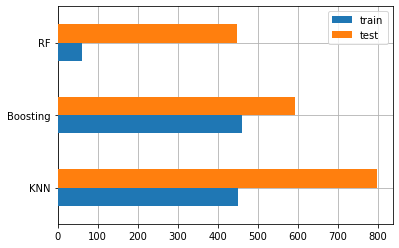

In [49]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

# Prediction

Berdasarkan grafik diatas, terlihat bahwa, model Random Forest (RF) memberikan skor nilai error paling kecil dibandingkan algoritma lain seperti KNN dan AdaBoost. Maka, Model Random Forest yang akan dipilih sebagai model terbaik untuk memprediksi harga jual rumah. Untuk mengujinya, kita buat prediksi menggunakan beberapa harga dari data test.

In [50]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
787,233000,222500.0,234851.5,241871.9


Terlihat bahwa prediksi Random Forest (RF) memberikan hasil yang paling mendekati dengan y_true (data test). Dimana nilai y_true adalah 233000 sedangkan nilai prediksi dari Random Forest adalah 234851.5.

# Prediksi menggunakan test data (Submission)

Test data diambil dari variabel test_data yang berisi file data pengujian yang berasal dari luar atau berasal dari file test.csv. Pertama kita cek terlebih dahulu isi test data tersebut.

In [132]:
test_house = pd.read_csv(test_data)

In [133]:
test_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Test data terdiri dari 1459 kolom yang didalamnya terdapat fitur yang mirip dengan train data (train.csv), hanya saja tidak terdapat label target yaitu SalePrice. Hal ini karena test data digunakan untuk melakukan pengujian dalam memprediksi harga jual rumah. Selanjutnya kita lakukan penyesuaian fitur agar memiliki dimensi yang sama dengan dataset yang digunakan pada model pelatihan.

Pertama, Sesuaikan kolom dengan cara menghapus fitur agar memiliki dimensi yang sama dengan dataset pelatihan

In [134]:
test_house.drop(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Utilities', 'Condition2', 'RoofMatl', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', "MSSubClass", "LotArea", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "BsmtFullBath", "FullBath", "HalfBath", "BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces", "WoodDeckSF", "OpenPorchSF", "MoSold", "YrSold"], inplace=True, axis=1)

test_house

,Id,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,HeatingQC,CentralAir,GrLivArea,KitchenQual,Functional,GarageCars,GarageArea,PavedDrive,SaleType,SaleCondition
0,1461,RH,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,...,TA,Y,896,TA,Typ,1.0,730.0,Y,WD,Normal
1,1462,RL,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,...,TA,Y,1329,Gd,Typ,1.0,312.0,Y,WD,Normal
2,1463,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,Gd,Y,1629,TA,Typ,2.0,482.0,Y,WD,Normal
3,1464,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,Ex,Y,1604,Gd,Typ,2.0,470.0,Y,WD,Normal
4,1465,RL,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,...,Ex,Y,1280,Gd,Typ,2.0,506.0,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,...,Gd,Y,1092,TA,Typ,0.0,0.0,Y,WD,Normal
1455,2916,RM,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,...,TA,Y,1092,TA,Typ,1.0,286.0,Y,WD,Abnorml
1456,2917,RL,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,Ex,Y,1224,TA,Typ,2.0,576.0,Y,WD,Abnorml
1457,2918,RL,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,TA,Y,970,TA,Typ,0.0,0.0,Y,WD,Normal


In [135]:
test_house = test_house.dropna()
test_house

,Id,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,HeatingQC,CentralAir,GrLivArea,KitchenQual,Functional,GarageCars,GarageArea,PavedDrive,SaleType,SaleCondition
0,1461,RH,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,...,TA,Y,896,TA,Typ,1.0,730.0,Y,WD,Normal
1,1462,RL,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,...,TA,Y,1329,Gd,Typ,1.0,312.0,Y,WD,Normal
2,1463,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,Gd,Y,1629,TA,Typ,2.0,482.0,Y,WD,Normal
3,1464,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,Ex,Y,1604,Gd,Typ,2.0,470.0,Y,WD,Normal
4,1465,RL,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,...,Ex,Y,1280,Gd,Typ,2.0,506.0,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,...,Gd,Y,1092,TA,Typ,0.0,0.0,Y,WD,Normal
1455,2916,RM,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,...,TA,Y,1092,TA,Typ,1.0,286.0,Y,WD,Abnorml
1456,2917,RL,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,Ex,Y,1224,TA,Typ,2.0,576.0,Y,WD,Abnorml
1457,2918,RL,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,...,TA,Y,970,TA,Typ,0.0,0.0,Y,WD,Normal


Selanjutnya, Encoding fitur kategori dan samakan dengan fitur yang ada di dataset pelatihan.

In [136]:
cat_features = test_house.select_dtypes(include='object').columns.to_list()

for feature in cat_features:
    dummies = pd.get_dummies(test_house[feature], prefix=feature)
    test_house = pd.concat([test_house, dummies], axis=1)

test_house.drop(cat_features, axis=1, inplace=True)
test_house.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,5,896,1.0,730.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1462,6,1329,1.0,312.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1463,5,1629,2.0,482.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1464,6,1604,2.0,470.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1465,8,1280,2.0,506.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


Lakukan proses PCA

In [137]:
pca = PCA(n_components=1, random_state=123)
pca.fit(test_house[['GrLivArea','GarageArea']])
test_house['dimension'] = pca.fit_transform(test_house.loc[:, ('GrLivArea','GarageArea')]).flatten()
test_house.drop(['GrLivArea','GarageArea'], axis=1, inplace=True)

Samakan semua fitur yang ada di kolom test data dengan train data

In [138]:
# Hapus kolom-kolom di test data yang tidak ada di train data
test_house = test_house[test_house.columns.intersection(house.columns.union(['Id']))]

test_house


,Id,OverallQual,GarageCars,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,dimension
0,1461,5,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,-506.426287
1,1462,6,1.0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,-193.810309
2,1463,5,2.0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,139.532921
3,1464,6,2.0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,112.304698
4,1465,8,2.0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,-191.922861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,0.0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,-502.291086
1455,2916,4,1.0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,-429.640928
1456,2917,5,2.0,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,-228.304474
1457,2918,5,0.0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,-620.289311


Lakukan scaling terhadap fitur numerik pada test_house sehingga memiliki rata-rata = 0 dan varians = 1

In [139]:
numerical_features = test_house.select_dtypes(include=['float64', 'int64']).columns.tolist()

test_house.loc[:, numerical_features[1:]] = scaler.transform(test_house[numerical_features[1:]])

In [140]:
test_house

,Id,OverallQual,GarageCars,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,dimension
0,1461,-0.985648,-1.189975,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,-1.183549
1,1462,-0.197130,-1.189975,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,-0.446075
2,1463,-0.985648,0.263430,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0.340295
3,1464,-0.197130,0.263430,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0.276062
4,1465,1.379908,0.263430,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,-0.441622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,-1.774167,-2.643380,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,-1.173793
1455,2916,-1.774167,-1.189975,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,-1.002409
1456,2917,-0.985648,0.263430,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,-0.527448
1457,2918,-0.985648,-2.643380,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,-1.452156


Selanjutnya dilakukan proses prediksi menggunakan model terbaik berdasarkan evaluasi model yaitu Random Forest.

In [141]:
# simpan kolom id dan pisahkan dari test_house agar fiturnya sama dengan dataset pelatihan model
ids = test_house.pop('Id')


In [142]:
# prediksi dengan random forest
preds = RF.predict(test_house)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

,Id,SalePrice
0,1461,117155.066667
1,1462,143960.900000
2,1463,170226.666667
3,1464,182921.666667
4,1465,200604.766667


In [143]:
# simpan hasil prediksi dalam format csv
output.to_csv("prediction_result.csv", index=False)